**Dataset**

- Paper: 8 Papers
- Published in: 
- Date: 2021
- Links: 
    - https://research.unsw.edu.au/projects/toniot-datasets
    - https://unsw-my.sharepoint.com/personal/z5025758_ad_unsw_edu_au/_layouts/15/onedrive.aspx

## Load Dataset

In [1]:
import pandas as pd

df = pd.read_csv("C:/Users/S4025371/OneDrive - RMIT University/Repositories/llm/data/ton-iot/TON_IoT datasets/Train_Test_datasets/Train_Test_Network_dataset/train_test_network.csv")

In [2]:
df.head()

,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,...,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label,type
0,192.168.1.37,4444,192.168.1.193,49178,tcp,-,290.371539,101568,2592,OTH,...,0,0,-,-,-,-,-,-,1,backdoor
1,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000102,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
2,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000148,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
3,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000113,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
4,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000130,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor


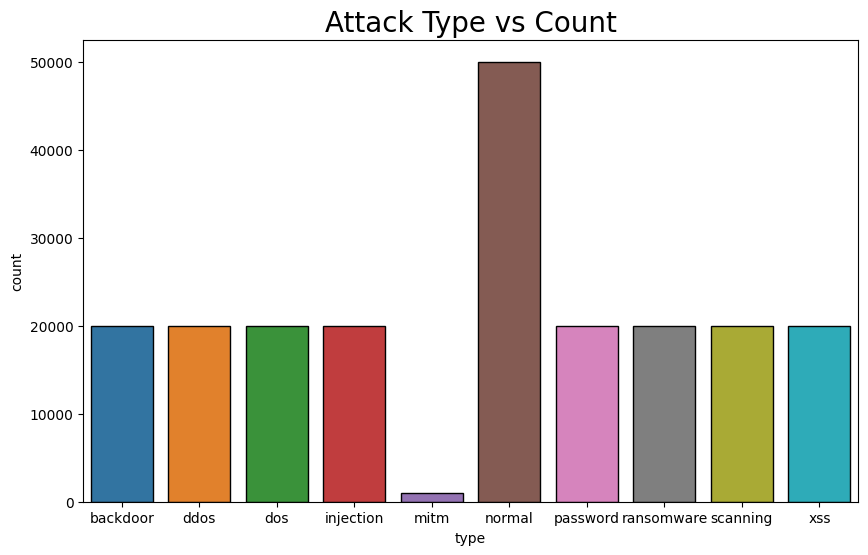

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='type', hue='type', edgecolor='black', linewidth=1)
plt.title('Attack Type vs Count', fontsize=20)
plt.show()

## Preprocessing

In [4]:
len(df.columns)

44

In [5]:
df.columns

Index(['src_ip', 'src_port', 'dst_ip', 'dst_port', 'proto', 'service',
       'duration', 'src_bytes', 'dst_bytes', 'conn_state', 'missed_bytes',
       'src_pkts', 'src_ip_bytes', 'dst_pkts', 'dst_ip_bytes', 'dns_query',
       'dns_qclass', 'dns_qtype', 'dns_rcode', 'dns_AA', 'dns_RD', 'dns_RA',
       'dns_rejected', 'ssl_version', 'ssl_cipher', 'ssl_resumed',
       'ssl_established', 'ssl_subject', 'ssl_issuer', 'http_trans_depth',
       'http_method', 'http_uri', 'http_version', 'http_request_body_len',
       'http_response_body_len', 'http_status_code', 'http_user_agent',
       'http_orig_mime_types', 'http_resp_mime_types', 'weird_name',
       'weird_addl', 'weird_notice', 'label', 'type'],
      dtype='object')

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
src_port,211043.0,38646.519543,1.930727e+04,1.0,34608.0,44754.00000,51133.000000,6.552800e+04
dst_port,211043.0,3495.153770,1.019162e+04,0.0,65.0,80.00000,1253.000000,6.546700e+04
duration,211043.0,7.700887,5.641419e+02,0.0,0.0,0.00017,0.054196,9.351693e+04
src_bytes,211043.0,258113.564274,1.709490e+07,0.0,0.0,0.00000,130.000000,3.890855e+09
dst_bytes,211043.0,258804.571575,1.802563e+07,0.0,0.0,0.00000,89.000000,3.913853e+09
missed_bytes,211043.0,34432.344295,5.261621e+06,0.0,0.0,0.00000,0.000000,1.854527e+09
src_pkts,211043.0,9.595220,9.177882e+01,0.0,1.0,1.00000,4.000000,2.462300e+04
src_ip_bytes,211043.0,776.082206,2.229703e+04,0.0,48.0,82.00000,415.000000,6.522626e+06
dst_pkts,211043.0,3.846861,3.307058e+02,0.0,0.0,1.00000,2.000000,1.219420e+05
dst_ip_bytes,211043.0,1584.686628,1.901795e+05,0.0,0.0,40.00000,134.000000,8.639552e+07


In [7]:
import numpy as np

df = df.replace("-", np.NaN)
df = df.drop_duplicates().reset_index(drop=True)

In [8]:
import warnings
warnings.filterwarnings('ignore')

# Consider only DDoS attack type
attack_types = ['normal', 'ddos']
normal_df = df[df['type'] == 'normal']
ddos_df = df[df['type'] == 'ddos']

# Get the columns with all zero values
columns_numeric = ddos_df.select_dtypes(include=[np.number]).columns
columns_to_drop = ["label", "type"]
for column in columns_numeric:
        if ddos_df[column].mean() == 0:
            columns_to_drop.append(column)

# Drop the columns with all zero values
columns_count_data = {"Attack Type": [], "#Columns Before": [], "#Columns After": []}
columns_count_data["Attack Type"].append('ddos')
columns_count_data["#Columns Before"].append(len(ddos_df.columns))
for column in columns_to_drop:
    ddos_df.drop(column, axis=1, inplace=True)
    normal_df.drop(column, axis=1, inplace=True)
columns_count_data["#Columns After"].append(len(ddos_df.columns))

columns_count_df = pd.DataFrame(columns_count_data)
columns_count_df

,Attack Type,#Columns Before,#Columns After
0,ddos,44,41


In [9]:
# Get random samples
sample_size = 100

random_samples_ddos_df = ddos_df.sample(n=sample_size, random_state=1)
random_samples_normal_df = normal_df.sample(n=sample_size, random_state=1)

In [15]:
random_samples_ddos_df.columns

Index(['src_ip', 'src_port', 'dst_ip', 'dst_port', 'proto', 'service',
       'duration', 'src_bytes', 'dst_bytes', 'conn_state', 'missed_bytes',
       'src_pkts', 'src_ip_bytes', 'dst_pkts', 'dst_ip_bytes', 'dns_query',
       'dns_qclass', 'dns_qtype', 'dns_rcode', 'dns_AA', 'dns_RD', 'dns_RA',
       'dns_rejected', 'ssl_version', 'ssl_cipher', 'ssl_resumed',
       'ssl_established', 'ssl_subject', 'ssl_issuer', 'http_trans_depth',
       'http_method', 'http_uri', 'http_version', 'http_response_body_len',
       'http_status_code', 'http_user_agent', 'http_orig_mime_types',
       'http_resp_mime_types', 'weird_name', 'weird_addl', 'weird_notice'],
      dtype='object')

# Evaluate LLM Models

## OpenAI

In [12]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
import tiktoken
import os
import dotenv
from sklearn.metrics import classification_report

dotenv.load_dotenv()
API_KEY = os.getenv("OPENAI_API_KEY")
llm = ChatOpenAI(openai_api_key=API_KEY, temperature=0.0)
encoding = tiktoken.encoding_for_model("gpt-3.5-turbo")
_prompt = "You are intelligent log analyzer. User gives you samples of benign " \
         "and attack iot network data. Analyze the samples and check whether the " \
         "user given data is benign or not. Output the label ATTACK or BENIGN, " \
         "nothing else. The samples has following fields respectively " \
         f"{random_samples_ddos_df.columns.tolist()}."

train_set_size = 25
test_set_size = 25

y_true = []
y_pred = []

def predict():
    messages = []
    system_prompt = ("system", _prompt)

    benign_samples = ""
    attack_samples = ""
    for i in range(train_set_size):
        benign_samples += str(random_samples_normal_df.iloc[i].values.tolist()) + ">>> BENIGN\n"
        attack_samples += str(random_samples_ddos_df.iloc[i].values.tolist()) + ">>> ATTACK\n"
    user_prompt = ("user", "Sample logs are given below ```" + benign_samples + attack_samples + "```")
    messages.append(system_prompt)
    messages.append(user_prompt)
    messages.append(("user", "{input}"))

    # print("Messages:", messages)
    num_tokens = len(encoding.encode(str(messages)))
    print("Num tokens:", num_tokens)

    prompt = ChatPromptTemplate.from_messages(messages)
    chain = prompt | llm 

    print("Predicting benign samples...")
    for i in range(train_set_size, train_set_size + test_set_size):
        y_true.append("BENIGN")
        y_pred.append(chain.invoke({"input": "Predict attack or benign: " + str(random_samples_normal_df.iloc[i].values.tolist())}).content)

    print("Predicting attack samples...")
    for j in range(train_set_size, train_set_size + test_set_size):
        y_true.append("ATTACK")
        y_pred.append(chain.invoke({"input": "Predict attack or benign: " + str(random_samples_ddos_df.iloc[j].values.tolist())}).content)

    print(classification_report(y_true, y_pred))



In [13]:
predict()

Num tokens: 6763
Predicting benign samples...
Predicting attack samples...
              precision    recall  f1-score   support

      ATTACK       0.75      0.96      0.84        25
      BENIGN       0.94      0.68      0.79        25

    accuracy                           0.82        50
   macro avg       0.85      0.82      0.82        50
weighted avg       0.85      0.82      0.82        50



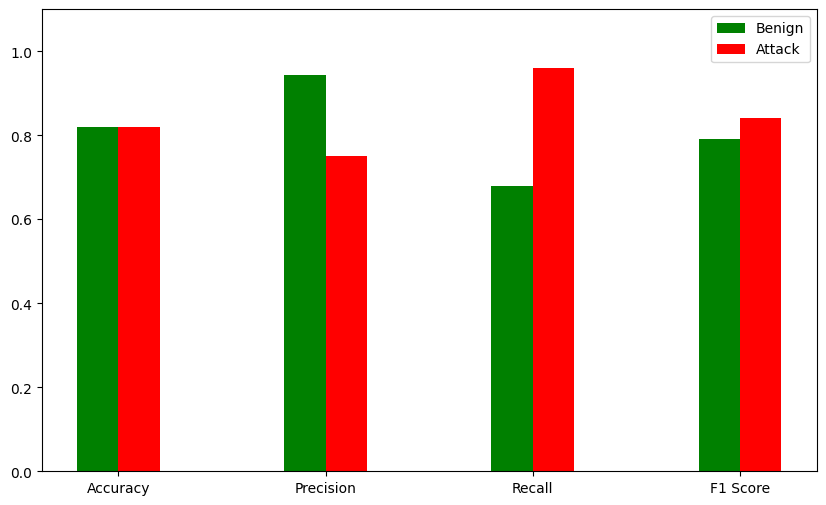

In [14]:
# get evaluation metrics
accuracy = classification_report(y_true, y_pred, output_dict=True)['accuracy']
normal_precision = classification_report(y_true, y_pred, output_dict=True)['BENIGN']['precision']
ddos_precision = classification_report(y_true, y_pred, output_dict=True)['ATTACK']['precision']
normal_recall = classification_report(y_true, y_pred, output_dict=True)['BENIGN']['recall']
ddos_recall = classification_report(y_true, y_pred, output_dict=True)['ATTACK']['recall']
normal_f1_score = classification_report(y_true, y_pred, output_dict=True)['BENIGN']['f1-score']
ddos_f1_score = classification_report(y_true, y_pred, output_dict=True)['ATTACK']['f1-score']

# plot evaluation metrics
bar_width = 0.2
x = np.arange(4)

plt.figure(figsize=(10, 6))
plt.bar(x - bar_width/2, [accuracy, normal_precision, normal_recall, normal_f1_score], bar_width, color='green', label='Benign')
plt.bar(x + bar_width/2, [accuracy, ddos_precision, ddos_recall, ddos_f1_score], bar_width, color='red', label='Attack')
plt.xticks(x, ['Accuracy', 'Precision', 'Recall', 'F1 Score'])
plt.ylim(0, 1.1)
plt.legend()
plt.show()

## Ollama

from langchain_community.chat_models import ChatOllama
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
import tiktoken

train_set_size = 25
test_set_size = 25

y_true = {}
y_pred = {}

def predict(attack_type, model):
    llm = ChatOllama(model=model, temperature=0)
    encoding = tiktoken.encoding_for_model("gpt-3.5-turbo")

    messages = []
    system_prompt = ("system", f"You are intelligent log analyzer. User gives you samples of benign and attack iot network data. Analyze the samples and check whether the user given data is benign or not. Output the label ATTACK or BENIGN, nothing else. The samples has following fields respectively {random_samples_ddos_dfs[attack_type].columns.tolist()}.")

    benign_samples = ""
    attack_samples = ""
    for i in range(train_set_size):
        benign_samples += str(random_samples_normal_dfs[attack_type].iloc[i].values.tolist()) + ">>> BENIGN\n"
        attack_samples += str(random_samples_ddos_dfs[attack_type].iloc[i].values.tolist()) + ">>> ATTACK\n"
    user_prompt = ("user", "Sample logs are given below ```" + benign_samples + attack_samples + "```")
    messages.append(system_prompt)
    messages.append(user_prompt)
    messages.append(("user", "{input}"))

    # print("Messages:", messages)
    num_tokens = len(encoding.encode(str(messages)))
    print("Num tokens:", num_tokens)

    prompt = ChatPromptTemplate.from_messages(messages)
    chain = prompt | llm | StrOutputParser()

    y_true[attack_type] = []
    y_pred[attack_type] = []

    print("Predicting benign samples...")
    for i in range(train_set_size, train_set_size + test_set_size):
        
        y_true[attack_type].append("BENIGN")
        y_pred[attack_type].append(chain.invoke({"input": "Predict attack or benign: " + 
                                    str(random_samples_normal_dfs[attack_type].iloc[i].values.tolist())}))
        print(i-train_set_size+1, end=" ")

    print("\nPredicting attack samples...")
    for j in range(train_set_size, train_set_size + test_set_size):
        y_true[attack_type].append("ATTACK")
        y_pred[attack_type].append(chain.invoke({"input": "Predict attack or benign: " + 
                                    str(random_samples_ddos_dfs[attack_type].iloc[j].values.tolist())}))
        print(j-train_set_size+1, end=" ")

    print(classification_report(y_true[attack_type], y_pred[attack_type]))